# comparing decision tree and random forest prediction

In [1]:
#import your libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Introduction to the dataset
The Institute of Education Sciences (IES) is the statistics, research, and evaluation arm of the U.S. Department of Education. This Department releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can [download the dataset Randal compiled here](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv).

In [2]:
# import your dataset
dataset = pd.read_csv("percent-bachelors-degrees-women-usa.csv")
dataset.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [3]:
print(dataset.columns)

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')


let's take some columns to compare the gender gap between males and females in college degrees
let's try the **"Business"** category

In [4]:
women_business = dataset["Business"]

men_business = 100 - women_business
men_business.head()

0    90.935561
1    90.496813
2    89.441038
3    87.195398
4    83.795150
Name: Business, dtype: float64

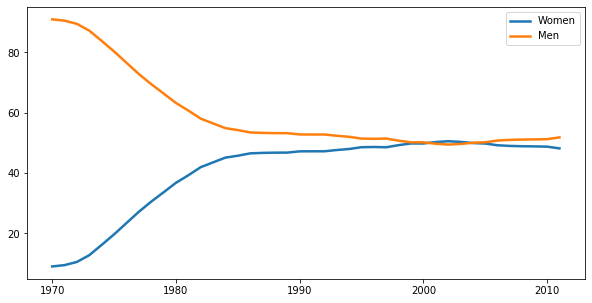

In [5]:
# plot to see the gap 
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)

#plot the women degree in business
ax.plot(dataset["Year"] , women_business, linewidth = 2.5, label = "Women")
ax.plot(dataset["Year"], men_business, linewidth = 2.5, label = "Men")
plt.legend(loc = "best")

plt.show()

from the graph we can see that the gender gap was high at 1970 to 1980 and then it has decreased till become ear at 2011
* we are going to build some models to predict the the percentage of college degrees granted for men and women

In [6]:
# create simple dataset from your original dataset
business = dataset.loc[:, ["Year" , "Business"]]
business["Men_business"] = men_business
business.columns = ["Year", "Women", "Men"]
business.head()

,Year,Women,Men
0,1970,9.064439,90.935561
1,1971,9.503187,90.496813
2,1972,10.558962,89.441038
3,1973,12.804602,87.195398
4,1974,16.204850,83.795150


In [7]:
#check for any missing values
count = 0
for value in business.columns:
    if (business[value].isnull) == True:
        count += 1
print(count)

# or use dataframe.isnull() method
business.isnull()

0


,Year,Women,Men
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [8]:
# no missing values
x = business.iloc[:, :-1].values
y = business.iloc[:, -1]

In [9]:
# split the data to train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 0)

In [10]:
print(x_train[:5])

[[2001.           50.27514494]
 [1999.           49.81020815]
 [1990.           47.20085084]
 [2009.           48.84047414]
 [1972.           10.5589621 ]]


In [11]:
print(y_train[:5])

31    49.724855
29    50.189792
20    52.799149
39    51.159526
2     89.441038
Name: Men, dtype: float64


### build Decision tree model

In [12]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor(random_state= 0)
model_1.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

**now we test our model with the the test dataset**

In [13]:
# testing model
y_pred = model_1.predict(x_test)
print(y_pred)

[50.18979185 51.11197322 51.3526074  87.19539848 66.37836619 51.3526074
 51.11197322 58.05062665 51.11197322]


**Compare The Predicted Values With Real Values**

In [14]:
# comparing the predicted (y_pred) result with the actual result (y_test)
decision_tree_predictions = np.concatenate(( np.array(y_test).reshape(-1,1), y_pred.reshape(-1,1)), axis= 1)
decision_tree_predictions

array([[50.19638351, 50.18979185],
       [50.78908561, 51.11197322],
       [51.43894967, 51.3526074 ],
       [83.79514962, 87.19539848],
       [63.23427471, 66.37836619],
       [51.42681899, 51.3526074 ],
       [50.7414848 , 51.11197322],
       [60.73377016, 58.05062665],
       [50.99954065, 51.11197322]])

**the model works well for test values let's evaluate the model for new record**
- **predict the percentage for men f the percentage of women in the year 2030 is 78 %**

In [15]:
print("the percentage of men in the Business category in colleges is {} % ".format(model_1.predict([[2030 , 78]])))

the percentage of men in the Business category in colleges is [49.4476654] % 


the prediction is pretty good from Decision Tree model

### Compare the actual gender gap in business and the predicted gender gap

In [16]:
business.head()

,Year,Women,Men
0,1970,9.064439,90.935561
1,1971,9.503187,90.496813
2,1972,10.558962,89.441038
3,1973,12.804602,87.195398
4,1974,16.204850,83.795150


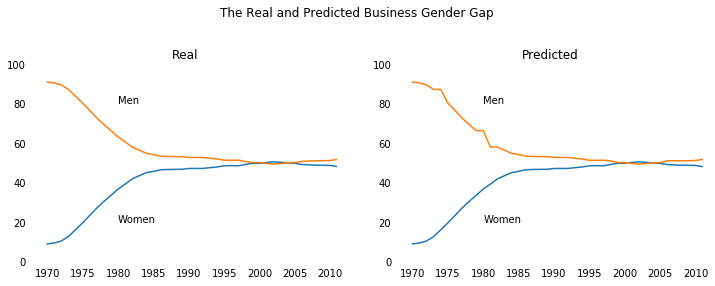

In [17]:
#create a Figure object and subplots
fig = plt.figure(figsize = (12,8))
fig.suptitle("The Real and Predicted Business Gender Gap")
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# actual values
ax1.plot(business["Year"] , business["Women"])
ax1.plot(business["Year"] , 100 - business["Women"])
ax1.set_title("Real")
ax1.set_ylim(0,100)
ax1.set_xlim(1968,2011)

# set labels
ax1.text(1980,20,"Women")
ax1.text(1980,80, "Men")

ax1.tick_params(left= False, right= False, top= False, bottom= False)    # hide ticks and spines
for key, spine in ax1.spines.items():
    spine.set_visible(False)
    

# plot the predicted values
ax2.plot(business["Year"], business["Women"])
ax2.plot(business["Year"], model_1.predict(business.loc[:, ["Year", "Women"]]))
ax2.set_title("Predicted")
ax2.set_ylim(0,100)
ax2.set_xlim(1968,2011)
# set labels
ax2.text(1980,20,"Women")
ax2.text(1980,80, "Men")

# hide ticks and spines
ax2.tick_params(left= False, right= False, top= False, bottom= False)
for key, spine in ax2.spines.items():
    spine.set_visible(False)
             
plt.show()

## Try the Random Forest Regression Algorithm

we are going to try the rando forest regression for the same values for **Business** category
- already we have our data splitted (x_train, y_train, x_test, y_test) 
we will build the model and train it  
- [here is](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) the class or random forest regressor

In [18]:
# build random forest regressor model

from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor(n_estimators= 10) # number of trees is 10

# fit your model with train data
model_2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

**trained sucessfully test it** 

In [19]:
# test the model for teste set (x_test)
forest_pred = model_2.predict(x_test)
forest_pred

array([50.18123024, 50.93596356, 51.07753321, 85.46104564, 67.61601224,
       51.14388003, 50.9840904 , 58.08812602, 51.11672848])

In [20]:
# bring your original values 
original = np.array(y_test)
original

array([50.19638351, 50.78908561, 51.43894967, 83.79514962, 63.23427471,
       51.42681899, 50.7414848 , 60.73377016, 50.99954065])

In [21]:
# concatenate both of them
random_forest_predictions = np.concatenate((original.reshape(-1,1) , forest_pred.reshape(-1,1)), axis = 1)
print("Random Forest Test Results:\n ", random_forest_predictions)

# display the Decision Tree Test Results
print("\nDecision Tree Test Results \n", decision_tree_predictions)

Random Forest Test Results:
  [[50.19638351 50.18123024]
 [50.78908561 50.93596356]
 [51.43894967 51.07753321]
 [83.79514962 85.46104564]
 [63.23427471 67.61601224]
 [51.42681899 51.14388003]
 [50.7414848  50.9840904 ]
 [60.73377016 58.08812602]
 [50.99954065 51.11672848]]

Decision Tree Test Results 
 [[50.19638351 50.18979185]
 [50.78908561 51.11197322]
 [51.43894967 51.3526074 ]
 [83.79514962 87.19539848]
 [63.23427471 66.37836619]
 [51.42681899 51.3526074 ]
 [50.7414848  51.11197322]
 [60.73377016 58.05062665]
 [50.99954065 51.11197322]]


the predictions of the 2 models are very near to each other can see that in second column of each array 
* the random forest is an ensemple learning algorithm based on Decision tree algorithm
- check the algorithm for the same point as previous model 
- **predict the percentage for men f the percentage of women in the year 2030 is 78 %**

In [22]:
print("the percentage of men in the Business category in colleges is {} % ".format(model_2.predict([[2030 , 78]])))

the percentage of men in the Business category in colleges is [49.82187434] % 


## lets see the plotting for Random Forest

In [23]:
business.head(2)

,Year,Women,Men
0,1970,9.064439,90.935561
1,1971,9.503187,90.496813


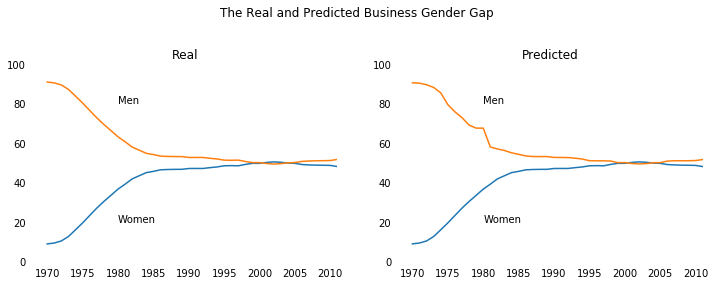

In [24]:
#create a Figure object and subplots
fig = plt.figure(figsize = (12,8))
fig.suptitle("The Real and Predicted Business Gender Gap")
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

# actual values
ax1.plot(business["Year"] , business["Women"])
ax1.plot(business["Year"] , 100 - business["Women"])
ax1.set_title("Real")
ax1.set_ylim(0,100)
ax1.set_xlim(1968,2011)

# set labels
ax1.text(1980,20,"Women")
ax1.text(1980,80, "Men")

ax1.tick_params(left= False, right= False, top= False, bottom= False)    # hide ticks and spines
for key, spine in ax1.spines.items():
    spine.set_visible(False)
    

# plot the predicted values
ax2.plot(business["Year"], business["Women"])
ax2.plot(business["Year"], model_2.predict(business.loc[:, ["Year", "Women"]]))
ax2.set_title("Predicted")
ax2.set_ylim(0,100)
ax2.set_xlim(1968,2011)
# set labels
ax2.text(1980,20,"Women")
ax2.text(1980,80, "Men")

# hide ticks and spines
ax2.tick_params(left= False, right= False, top= False, bottom= False)
for key, spine in ax2.spines.items():
    spine.set_visible(False)
             
plt.show()

In [25]:
#some new values for model 1

model_1.predict([[1990,20], [2000, 40], [2005 ,30], [2025, 60]])

array([76.5699625 , 56.45793034, 69.47248132, 49.4476654 ])

In [26]:
# some new values for model 2
model_2.predict([[1990,20], [2000, 40], [2005 ,30], [2025,60]])

array([68.85676757, 54.50747249, 62.40444667, 49.82187434])

# Concolusion

this priject is just a trial to compine what I have learned this week so I can not gurantee that ou can learn much from it I am just a beginner who is trying to compine skills together , happy to get you feedback . Thanks